#Exploration of phase space using RAVE data

In [1]:
from __future__ import print_function, division

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table

import astropy.units as u
import astropy.coordinates as coord
import gary.coordinates as gc

%matplotlib inline
plt.style.use('notebook')

### Load data

In [2]:
trave = Table.read('../../data/rave.fits')

In [3]:
trave.pprint()

   _RAJ2000      _DEJ2000           RAVE        ...    RAJ2000       DEJ2000    
     deg           deg                          ...      deg           deg      
------------- -------------- ------------------ ... ------------- --------------
227.112041667 -24.6530277778 J150826.9-243911   ... 227.112041667 -24.6530277778
   227.133875      -24.49525 J150832.1-242943   ...    227.133875      -24.49525
226.958208333 -24.5460555556 J150750.0-243246   ... 226.958208333 -24.5460555556
    226.33675 -25.1566666667 J150520.8-250924   ...     226.33675 -25.1566666667
225.883333333 -25.5840277778 J150332.0-253503   ... 225.883333333 -25.5840277778
226.060958333 -24.9537777778 J150414.6-245714   ... 226.060958333 -24.9537777778
226.728833333 -24.6305277778 J150654.9-243750   ... 226.728833333 -24.6305277778
   225.768375 -25.2335277778 J150304.4-251401   ...    225.768375 -25.2335277778
226.210541667 -24.3348055556 J150450.5-242005   ... 226.210541667 -24.3348055556
225.798583333 -24.7764444444

In [4]:
trave.colnames

['_RAJ2000',
 '_DEJ2000',
 'RAVE',
 'HRV',
 'e_HRV',
 'TYCHO2',
 'distT2',
 'XT2',
 'pmRAT2',
 'e_pmRAT2',
 'pmDET2',
 'e_pmDET2',
 'TeffK',
 'loggK',
 'c_M_H_K',
 'Jmag2',
 'Hmag2',
 'Kmag2',
 'ImagD',
 'plx',
 'Dist',
 'Av',
 'Age',
 'Mass',
 'c1',
 'c2',
 'c3',
 'RAJ2000',
 'DEJ2000']

In [5]:
finite = np.isfinite(trave['Dist']) & np.isfinite(trave['pmRAT2'])
trave = trave[finite]
print(np.sum(finite))

236794


### Galactocentric coordinates

In [6]:
c = coord.SkyCoord(ra=trave['RAJ2000'], 
               dec=trave['DEJ2000'], 
               distance=trave['Dist'])
cgal = c.transform_to(coord.Galactocentric) 
x = np.transpose([cgal.x, cgal.y, cgal.z])*u.kpc

In [7]:
v = np.transpose(gc.vhel_to_gal(c.icrs, rv=trave['HRV'], 
                   pm=[trave['pmRAT2'], trave['pmDET2']]*u.mas/u.yr))

### Energy and angular momentum

In [8]:
Ek = 0.5*np.linalg.norm(v, axis=1)**2

In [9]:
L = np.cross(x, v, axis=1)

In [10]:
L2 = np.linalg.norm(L, axis=1)
Lperp = np.sqrt(L[:,0]**2 + L[:,1]**2)
counter_rotating = L[:,2]>0

### Configuration space

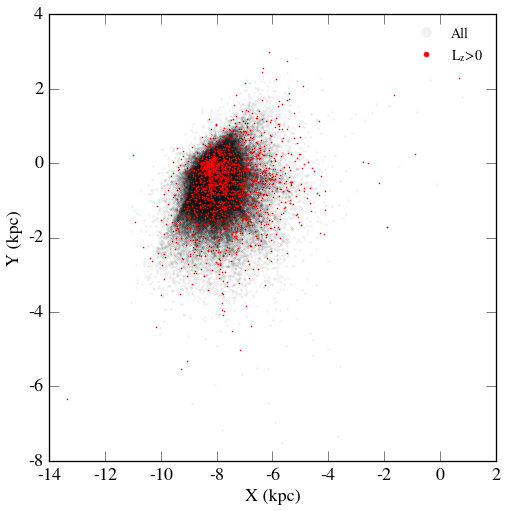

In [11]:
plt.plot(x[:,0], x[:,1], 'ko', ms=2, alpha=0.05, label='All')
plt.plot(x[:,0][counter_rotating], x[:,1][counter_rotating], 'ro', ms=1, mec='r', label='$L_z$>0')
plt.xlabel('X (kpc)');
plt.ylabel('Y (kpc)');
plt.legend(frameon=False, fontsize=14, numpoints=1, markerscale=5);

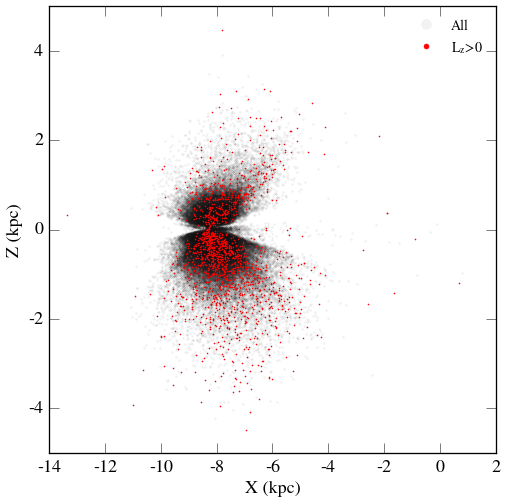

In [12]:
plt.plot(x[:,0], x[:,2], 'ko', ms=2, alpha=0.05, label='All')
plt.plot(x[:,0][counter_rotating], x[:,2][counter_rotating], 'ro', ms=1, mec='r', label='$L_z$>0')
plt.xlabel('X (kpc)');
plt.ylabel('Z (kpc)');
plt.legend(frameon=False, fontsize=14, numpoints=1, markerscale=5);

### Phase space

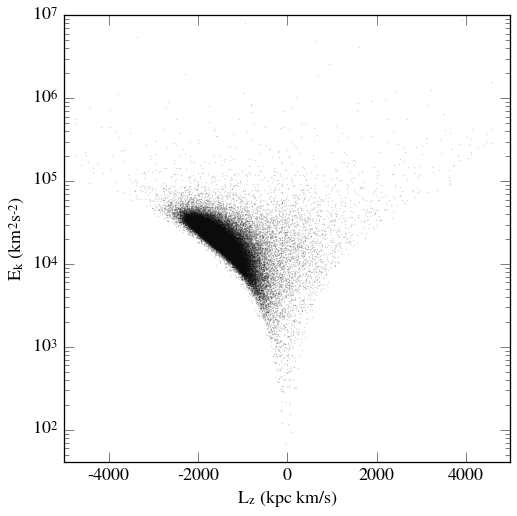

In [13]:
plt.plot(L[:,2], Ek, 'ko', ms=1, alpha=0.1)
plt.gca().set_yscale('log')
plt.xlim(-5000,5000)
plt.ylim(0,10**7)
plt.xlabel('$L_z$ (kpc km/s)');
plt.ylabel('$E_k$ ($km^2 s^{-2}$)');

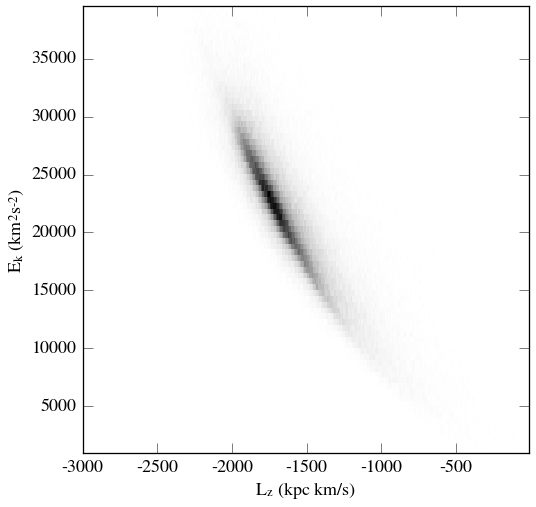

In [14]:
plt.hist2d(L[:,2], Ek, bins=(np.arange(-3000,0,10), np.arange(1000,40000,500)), cmap='binary');
plt.xlabel('$L_z$ (kpc km/s)');
plt.ylabel('$E_k$ ($km^2 s^{-2}$)');

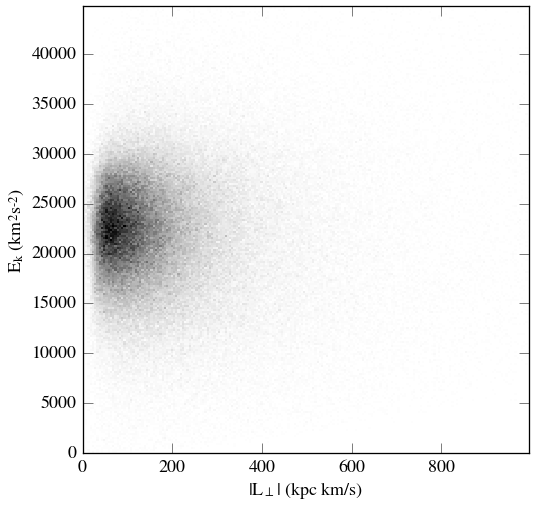

In [15]:
plt.hist2d(Lperp, Ek, bins=(np.arange(0,1000,5), np.arange(0,45000,200)), cmap='binary');
plt.xlabel('$|L_\perp|$ (kpc km/s)');
plt.ylabel('$E_k$ ($km^2 s^{-2}$)');

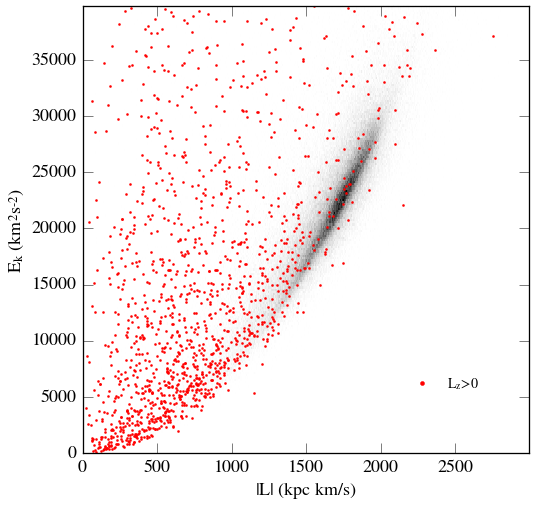

In [16]:
plt.hist2d(L2, Ek, bins=(np.arange(0,3000,5), np.arange(0,40000,200)), cmap='binary');
plt.plot(L2[counter_rotating], Ek[counter_rotating], 'ro', mec='r', ms=2, label='$L_z$>0')
plt.xlabel('$|L|$ (kpc km/s)')
plt.ylabel('$E_k$ ($km^2 s^{-2}$)')
plt.legend(frameon=False, fontsize=14, numpoints=1, markerscale=2, loc='upper left', bbox_to_anchor=(0.7, 0.2));

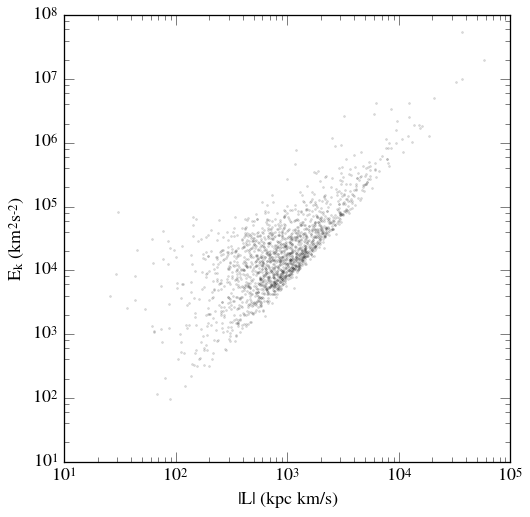

In [17]:
plt.plot(L2[counter_rotating], Ek[counter_rotating], 'ko', ms=2, alpha=0.15)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('$|L|$ (kpc km/s)');
plt.ylabel('$E_k$ ($km^2 s^{-2}$)');